<a href="https://colab.research.google.com/github/marisbotero/ML/blob/master/modelo_punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo y análisis descriptivo

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import math
import missingno as msno

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Sistema
import os
from pathlib import Path

# Preprocesamiento / ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# xgboost - Ensemble Methods
from xgboost import XGBClassifier, plot_importance

# Pipeline, compose sklearn
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,10)

In [5]:
dataset_df= pd.read_csv('/content/datos.csv')

In [6]:
dataset_df.head()

,Unnamed: 0,ID,Edad,Dependientes,Ingresos,Historial_Credito,Monto_Solicitado,Estado_Civil,Educacion,Subsidios_Anteriores,Elegibilidad
0,0,79303,41.0,2,102755.0,Regular,11332.0,Divorciado,Universitaria,0,True
1,1,67465,48.0,1,20697.0,Malo,12309.0,Viudo,Universitaria,1,True
2,2,94228,41.0,2,77566.0,Regular,16482.0,Soltero,Universitaria,0,True
3,3,2748,46.0,0,43149.0,bueno,17189.0,Viudo,Postgrado,0,True
4,4,81005,40.0,1,64974.0,Regular,6537.0,Viudo,Postgrado,1,False


In [7]:
dataset_df.tail()

,Unnamed: 0,ID,Edad,Dependientes,Ingresos,Historial_Credito,Monto_Solicitado,Estado_Civil,Educacion,Subsidios_Anteriores,Elegibilidad
100495,100495,7266,52.0,4,82646.0,Malo,6520.0,Divorciado,Universitaria,1,True
100496,100496,55887,27.0,0,74531.0,bueno,13239.0,Soltero,Postgrado,1,False
100497,100497,77821,31.0,2,361610.0,Regular,3417.0,Viudo,Postgrado,0,False
100498,100498,1861,64.0,4,83115.0,Malo,5317.0,Casado,Postgrado,0,True
100499,100499,16796,26.0,1,51067.0,bueno,10884.0,Viudo,Universitaria,1,True


In [8]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100500 entries, 0 to 100499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100500 non-null  int64  
 1   ID                    100500 non-null  int64  
 2   Edad                  100500 non-null  float64
 3   Dependientes          100500 non-null  int64  
 4   Ingresos              100500 non-null  float64
 5   Historial_Credito     100500 non-null  object 
 6   Monto_Solicitado      100500 non-null  float64
 7   Estado_Civil          100500 non-null  object 
 8   Educacion             100500 non-null  object 
 9   Subsidios_Anteriores  100500 non-null  int64  
 10  Elegibilidad          100500 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 7.8+ MB


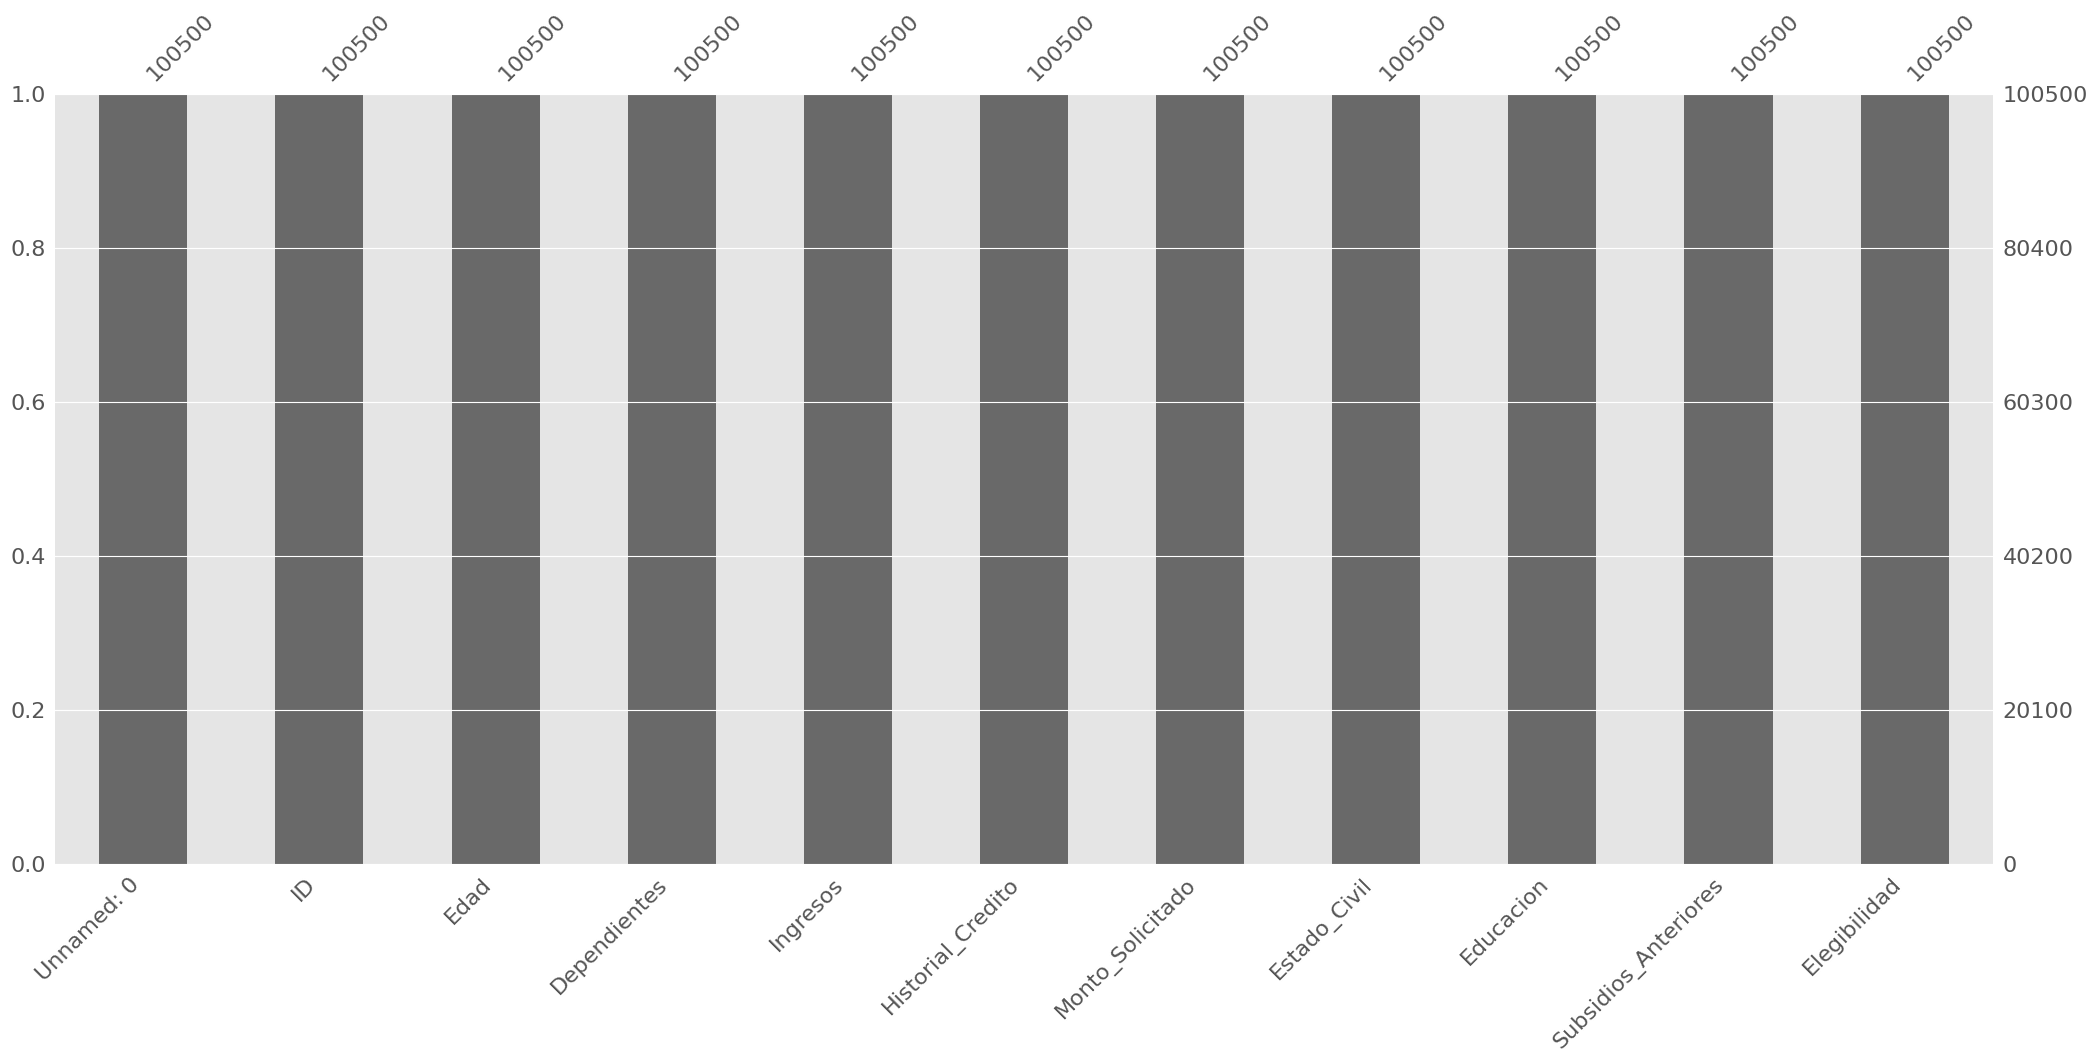

In [9]:

ax_missing = msno.bar(df = dataset_df)
plt.show()

In [10]:
dataset_df.isnull().sum(axis = 0)

Unnamed: 0              0
ID                      0
Edad                    0
Dependientes            0
Ingresos                0
Historial_Credito       0
Monto_Solicitado        0
Estado_Civil            0
Educacion               0
Subsidios_Anteriores    0
Elegibilidad            0
dtype: int64

In [11]:
cols_num = dataset_df.select_dtypes(include=np.number).columns.tolist()
cols_num

['Unnamed: 0',
 'ID',
 'Edad',
 'Dependientes',
 'Ingresos',
 'Monto_Solicitado',
 'Subsidios_Anteriores']

In [12]:
cols_non_num = dataset_df.select_dtypes(exclude=np.number).columns.tolist()
cols_non_num

['Historial_Credito', 'Estado_Civil', 'Educacion', 'Elegibilidad']

In [13]:
dataset_df.describe(include = np.number)

,Unnamed: 0,ID,Edad,Dependientes,Ingresos,Monto_Solicitado,Subsidios_Anteriores
count,100500.000000,100500.000000,100500.000000,100500.000000,1.005000e+05,100500.000000,100500.000000
mean,50249.500000,51001.764060,41.034408,1.999871,1.181193e+05,10514.767701,0.500537
std,29011.995364,28868.945398,13.180606,1.415518,1.870181e+05,5342.160945,0.500002
min,0.000000,1001.000000,18.000000,0.000000,2.000000e+04,1000.000000,0.000000
25%,25124.750000,26003.750000,30.000000,1.000000,4.867425e+04,6032.000000,0.000000
50%,50249.500000,51004.500000,41.000000,2.000000,7.453100e+04,10520.000000,1.000000
75%,75374.250000,76007.250000,52.000000,3.000000,9.984500e+04,15013.000000,1.000000
max,100499.000000,101000.000000,64.000000,4.000000,1.199450e+06,19999.000000,1.000000


- Edad: La edad promedio de los individuos en el conjunto de datos es aproximadamente 41 años.
- Dependientes: En promedio, los individuos tienen cerca de 2 dependientes.
- Ingresos: Los ingresos promedio son de aproximadamente 118,119, lo cual podría indicar el ingreso anual en la moneda local.
- Monto Solicitado: En promedio, el monto solicitado para préstamos es de aproximadamente 10,515.
- Subsidios Anteriores: Aproximadamente la mitad de los individuos han recibido subsidios anteriores (media de 0.5).

Mínimos y Máximos (min/max):
- Edad: Las edades varían de 18 a 64 años.
- Dependientes: Van de 0 a 4 dependientes.
- Ingresos: Varían considerablemente de 20,000 a 1,199,450.
- Monto Solicitado: El rango es de 1,000 a 19,999.

In [14]:
dataset_df.describe(include = 'object')

,Historial_Credito,Estado_Civil,Educacion
count,100500,100500,100500
unique,3,4,4
top,bueno,Viudo,Universitaria
freq,41289,28593,35499


En el caso del Historial de Crédito, la mayoría de las personas tienen un historial calificado como "bueno", con 41,289 registros en esta categoría. Respecto al Estado Civil, "Viudo" es el más prevalente con 28,593 ocurrencias, lo que podría reflejar particularidades culturales o demográficas de la población estudiada. En cuanto a la Educación, "Universitaria" es el nivel educativo más común, representando 35,499 personas, lo que indica una proporción significativa de individuos con educación superior en tu muestra.

In [47]:
dataset_df.groupby('Elegibilidad').describe()['Monto_Solicitado']

,count,mean,std,min,25%,50%,75%,max
Elegibilidad,,,,,,,,
False,50362.0,10502.919165,5341.169727,1000.0,6022.25,10520.0,15013.00,19999.0
True,50138.0,10526.669173,5343.183220,1001.0,6047.00,10520.0,15013.75,19999.0


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mean']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mean'}, axis=1)
              .sort_values('mean', ascending=True))
  xs = counted['mean']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['std']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('std', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('std')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['std']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'std'}, axis=1)
              .sort_values('std', ascending=True))
  xs = counted['std']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('std', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('std')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:

dataset_df.groupby('Elegibilidad').describe()['Edad']

,count,mean,std,min,25%,50%,75%,max
Elegibilidad,,,,,,,,
False,50362.0,41.036337,13.135683,18.0,30.0,41.0,52.0,64.0
True,50138.0,41.032470,13.225708,18.0,30.0,41.0,52.0,64.0


from matplotlib import pyplot as plt
_df_16['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['std']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('std', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('std')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['std']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('std', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('std')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['std']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'std'}, axis=1)
              .sort_values('std', ascending=True))
  xs = counted['std']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('std', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('std')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
_df_25['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

la edad promedio es de alrededor de 41 años, con una variabilidad mínima entre los grupos. Las edades varían de 18 a 64 años en ambos, y tanto los cuartiles como la desviación estándar son prácticamente idénticos.

Ambos grupos, tanto elegibles como no elegibles, presentan estadísticas muy parecidas en términos de montos solicitados, con medias y medianas casi idénticas, y una distribución similar en los cuartiles y rangos de montos. Esto sugiere que la elegibilidad no está fuertemente correlacionada con la cantidad de dinero solicitada en los préstamos dentro de este dataset.

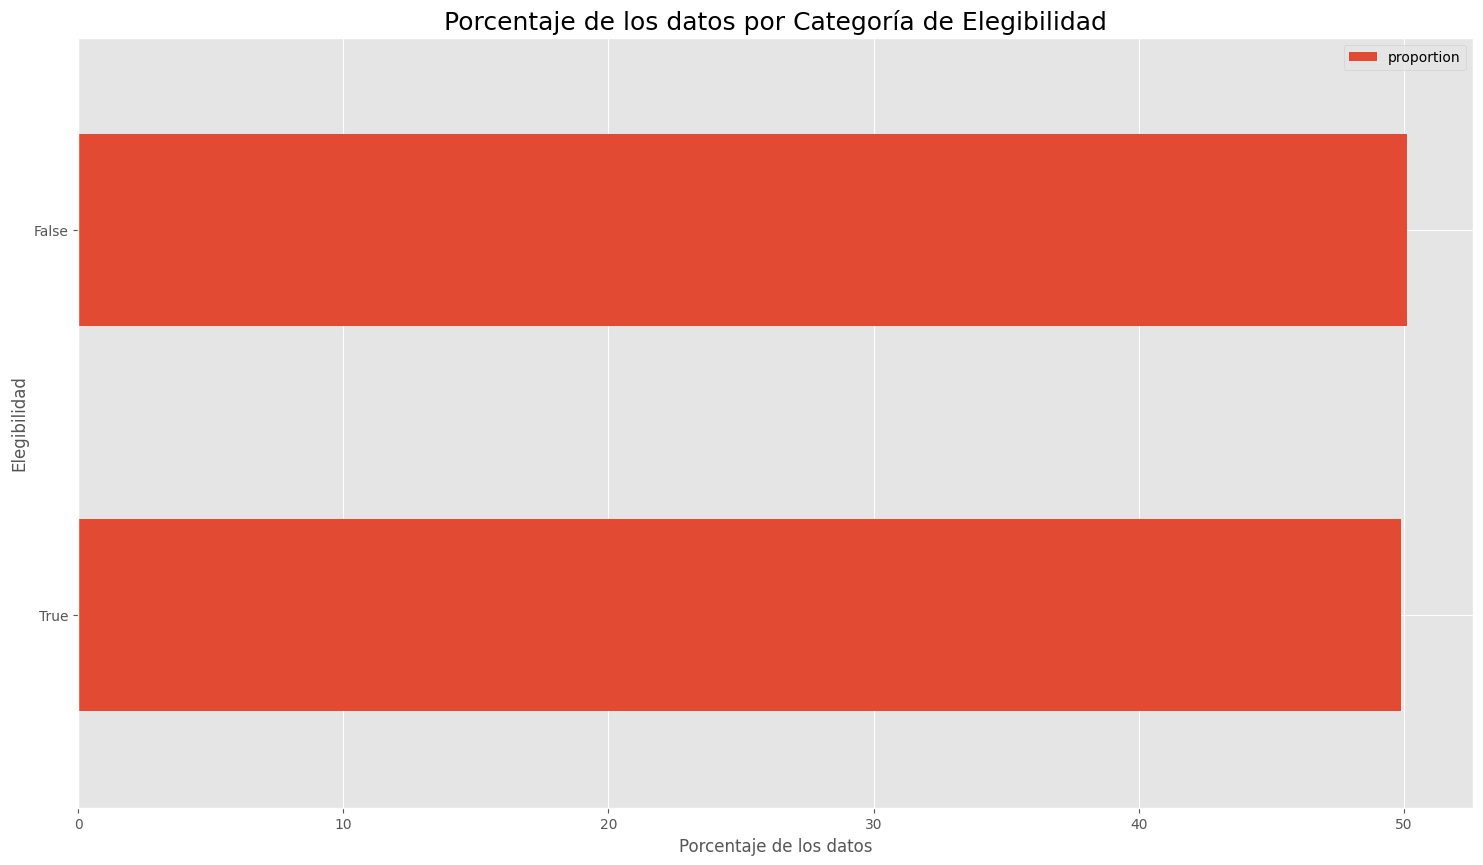

In [46]:
Exited_size = 100*dataset_df.Elegibilidad.value_counts(normalize = True, ascending =True)
ax_exited = Exited_size.plot(kind = 'barh',
                             xlabel = 'Elegibilidad',
                             legend = True)

ax_exited.set_title('Porcentaje de los datos por Categoría de Elegibilidad', fontsize = 18)
ax_exited.set_xlabel('Porcentaje de los datos')
plt.show()

In [23]:
corr_ = dataset_df.select_dtypes(include=[np.number]).corr(method  = 'pearson')
mask_corr = np.triu(np.ones_like(corr_, dtype = bool))

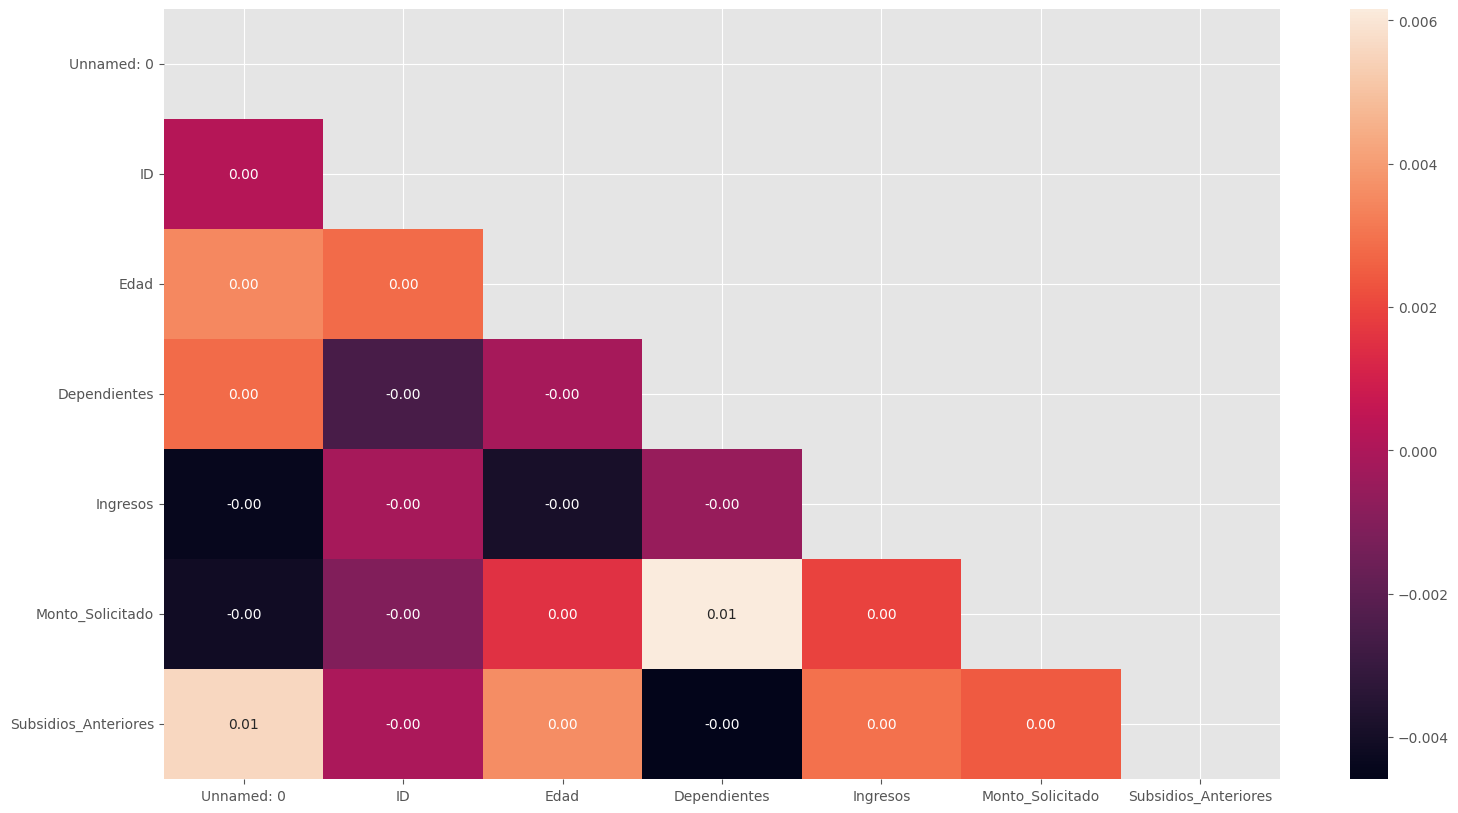

In [24]:
ax_corr = sns.heatmap(data = corr_, annot = True, fmt = '.2f', mask = mask_corr)
plt.show()

- No hay  ninguna correlación fuerte entre las variables, ya que todos los valores están cerca de cero.
- La correlación más alta parece ser entre la cantidad solicitada (Monto_Solicitado) y el número de dependientes (Dependientes), con un valor de correlación de 0.006156. Sin embargo, esta correlación es muy baja y probablemente no sea significativa en términos prácticos.

In [25]:

dataset_df.drop(columns=['ID', 'Unnamed: 0'], inplace = True)

In [26]:

X = dataset_df.iloc[:,:-1]
y = dataset_df.iloc[:,[-1]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 111, stratify = y )

In [28]:
feat_num = dataset_df.drop(columns='Elegibilidad').select_dtypes(include=[np.number]).columns.tolist()
feat_cat = dataset_df.select_dtypes(include=['object']).columns.tolist()

In [29]:
#One-Hot Encoding para transformar de variables categóricas a un arreglo numérico
cat_pipeline = make_pipeline(
    OneHotEncoder(categories='auto'
                  ,handle_unknown='ignore',
                  sparse = False)
    )

In [30]:
num_pipeline = make_pipeline(
    StandardScaler()
    )

In [31]:
num_pipeline = make_pipeline(
    StandardScaler()
    )

In [33]:
comb_pipeline = ColumnTransformer([
    ('num',num_pipeline,feat_num),
    ('cat',cat_pipeline,feat_cat)
])

In [34]:

xgb_pipeline = Pipeline(
    [('comb_pipeline',comb_pipeline),
    ('xgb_model',XGBClassifier(objective ='binary:logistic',
                               booster = 'gbtree',
                               eval_metric='error',
                               use_label_encoder=False))])

In [35]:
xgb_params = {
        "xgb_model__n_estimators": [10,50,80,100],
        "xgb_model__max_depth": [3, 4, 5, 6, 8, 10, 12],
        "xgb_model__learning_rate": [ 0.10, 0.15, 0.20, 0.25, 0.30],
        "xgb_model__gamma": [0.1, 0.2, 0.3, 0.4],
        "xgb_model__min_child_weight": [1, 3, 5, 7],
        "xgb_model__colsample_bytree": [0.3, 0.4, 0.5, 0.7],

        }

In [36]:
xgb_rs_cv = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=xgb_params,
    n_iter = 5,
    scoring = 'accuracy',
    cv = 5,
    verbose=1)

In [37]:

xgb_rs_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('comb_pipeline',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Edad',
                                                                                'Dependientes',
                                                                                'Ingresos',
                                                                                'Monto_Solicitado',
                                                                                'Subsidios_Anteriores']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['Historial_Credi...
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=5,
                   param_distributions={'xgb_model__colsample_bytree': [0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.7],
                                        'xgb_model__gamma': [0.1, 0.2, 0.3,
                                                             0.4],
                                        'xgb_model__learning_rate': [0.1, 0.15,
                                                                     0.2, 0.25,
                                                                     0.3],
                                        'xgb_model__max_depth': [3, 4, 5, 6, 8,
                                                                 10, 12],
                                        'xgb_model__min_child_weight': [1, 3, 5,
                                                                        7],
                                        'xgb_model__n_estimators': [10, 50, 80,
                                                                    100]},
                   scoring='accuracy', verbose=1)

Se implementó un procedimiento de optimización de hiperparámetros utilizando RandomizedSearchCV en un pipeline que combina el preprocesamiento y la clasificación. El preprocesamiento estandariza las variables numéricas y codifica las categóricas para alimentar un XGBClassifier, un modelo avanzado basado en Gradient Boosting. La búsqueda aleatoria evaluó combinaciones de hiperparámetros sobre 5 particiones de validación cruzada, optimizando para la máxima precisión. Este enfoque proporciona un modelo bien ajustado, buscando el equilibrio entre rendimiento y generalización para realizar predicciones precisas.








In [38]:

xgb_rs_cv.best_score_

0.5022761194029851

In [39]:
xgb_rs_cv.best_estimator_.named_steps['xgb_model']

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
print(f'Accuracy del Clasificador xgboost en el conjunto de entrenamiento:{xgb_rs_cv.score(X=X_train,y=y_train)}')

Accuracy del Clasificador xgboost en el conjunto de entrenamiento:0.6402363184079602


In [41]:
print(f'Accuracy del Clasificador xgboost en el conjunto de prueba:{xgb_rs_cv.score(X=X_test,y=y_test)}')

Accuracy del Clasificador xgboost en el conjunto de prueba:0.49955223880597016


El XGBClassifier alcanzó una precisión (accuracy) de aproximadamente 64.02% en el conjunto de entrenamiento, lo cual es un indicador de su rendimiento en los datos que ha "visto" durante el ajuste del modelo. Sin embargo, la precisión en el conjunto de prueba fue significativamente más baja, aproximadamente 49.95%. Esta disminución en el rendimiento al pasar de los datos de entrenamiento a los datos de prueba sugiere que el modelo puede estar sobreajustado, es decir, aprendió patrones específicos del conjunto de entrenamiento que no generaliza bien a datos nuevos

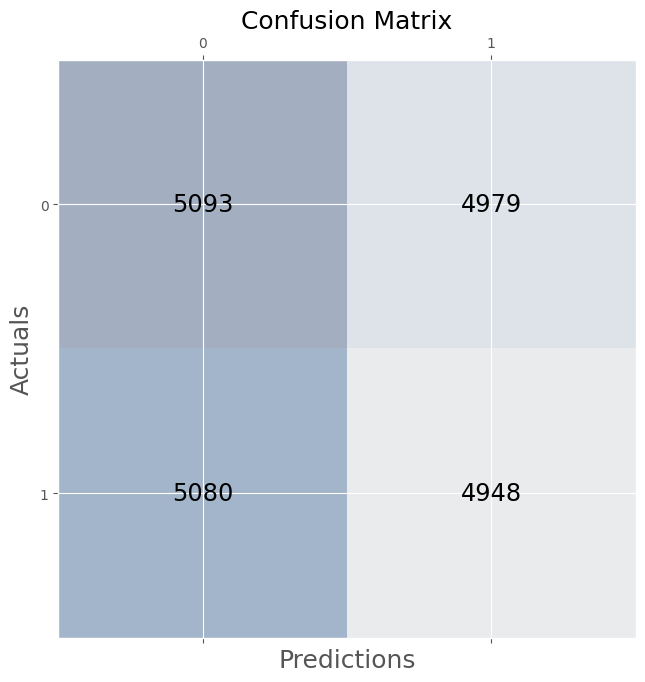

In [42]:
# Calculo de la matriz de confusión conjunto de prueba
conf_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_rs_cv.predict(X_test))

# Matriz de Confusión
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
print(classification_report(y_test,xgb_rs_cv.predict(X_test)))

              precision    recall  f1-score   support

       False       0.50      0.51      0.50     10072
        True       0.50      0.49      0.50     10028

    accuracy                           0.50     20100
   macro avg       0.50      0.50      0.50     20100
weighted avg       0.50      0.50      0.50     20100



términos de precisión, recall y f1-score entre las dos clases, con cada métrica alrededor del 50% para ambas clases. Esto sugiere que el modelo está realizando aproximadamente igual en ambas clases, Sin embargo, la precisión global de 50% indica que hay mucho margen para mejora.

- Precision: La precisión de ambas clases es del 50%, lo que significa que, de todas las instancias clasificadas en cada clase, solo la mitad fueron clasificaciones correctas.
- Recall: El recall (también conocido como sensibilidad) también es similar para ambas clases, siendo 51% para False y 49% para True. Esto indica que el modelo identificó correctamente el 51% de todos los casos reales de False y el 49% de todos los casos reales de True.
- F1-Score: El F1-score, que es el promedio armónico de la precisión y el recall, es de 0.50 para ambas clases, lo cual es un indicador de que el modelo tiene un equilibrio entre la precisión y el recall, pero a un nivel no muy alto de rendimiento.
- Support: Indica el número de ocurrencias reales de cada clase en el conjunto de prueba, mostrando que el conjunto de prueba está balanceado.
- Accuracy: La precisión general es del 50%, lo que significa que el modelo predijo correctamente la mitad de las instancias del conjunto de prueba.
- Macro Avg: La media de las métricas para ambas clases sin tener en cuenta el soporte es del 50%, lo que refleja un rendimiento uniforme entre clases.
- Weighted Avg: La media ponderada también es del 50%, lo cual es consistente dado que las clases están balanceadas

## Conclusiones:

El XGBClassifier aplicado al conjunto de datos en cuestión ha mostrado un rendimiento justo en la clasificación, con una precisión del 64.02% en el conjunto de entrenamiento y una reducción hasta el 49.95% en el conjunto de prueba. Las métricas de precisión, recall y F1-score indican un rendimiento similar a un lanzamiento de moneda, lo que sugiere que el modelo no está capturando adecuadamente las relaciones subyacentes en los datos para hacer predicciones efectivas. La uniformidad en el rendimiento para las clases False y True refleja que el modelo no está sesgado hacia una clase específica, pero también resalta su incapacidad para distinguir entre las clases de manera efectiva.

## Recomendaciones:

- Revisar el Sobreajuste
- Mejora del Preprocesamiento
- ecopilación de Más Datos o Revisión de los Datos Existentes